In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy
from skimage.util import img_as_ubyte
from skimage.morphology import skeletonize
from skimage.util import invert
from skimage.segmentation import flood_fill

In [2]:
# Source https://github.com/jmlipman/LAID/blob/master/IP/Otsu/otsu.py
def otso_threshold(img):
    [hist, _] = np.histogram(img, bins=256, range=(0, 255))
    # Normalization so we have probabilities-like values (sum=1)
    hist = 1.0*hist/np.sum(hist)

    val_max = -999
    thr = -1
    for t in range(1,255):
        # Non-efficient implementation
        q1 = np.sum(hist[:t])
        q2 = np.sum(hist[t:])
        m1 = np.sum(np.array([i for i in range(t)])*hist[:t])/q1
        m2 = np.sum(np.array([i for i in range(t,256)])*hist[t:])/q2
        val = q1*(1-q1)*np.power(m1-m2,2)
        if val_max < val:
            val_max = val
            thr = t
    return thr

def binarize_img(img):
    copy_img = copy.deepcopy(img)
    tresh = otso_threshold(copy_img)

    for i in range(len(copy_img)):
        for j in range(len(copy_img[i])):
            if copy_img[i][j] >= tresh:
                copy_img[i][j] = 1
            else: 
                copy_img[i][j] = 0
    return copy_img

def convert_to_gray(img):
    r_img, g_img, b_img = copy.deepcopy(img), copy.deepcopy(img), copy.deepcopy(img)
    r_img = img[:, :, 0]
    g_img = img[:, :, 1]
    b_img = img[:, :, 2]
    intensity_img = 0.299*r_img + 0.587*g_img + 0.114*b_img
    
    return intensity_img

def get_binary_img(img_path):
    img = plt.imread(img_path)
    img = img_as_ubyte(img)
    gray_img = convert_to_gray(img)
    binary_img = binarize_img(gray_img)
    return binary_img

def skeletonize_img_path(img_path):
    binary_img = get_binary_img(img_path)
    skeleton = skeletonize(binary_img)
    invert_skeleton = invert(skeleton)
    
    return invert_skeleton

def skeletonize_img_array(img):
    skeleton = skeletonize(img)
    invert_skeleton = invert(skeleton)
    
    return invert_skeleton

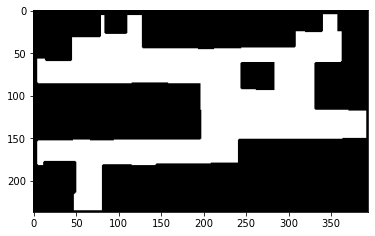

In [4]:
img = get_binary_img("floorplans/research_paper_sample_binarization.png")

plt.imshow(img, cmap='gray')
plt.show()